In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
data = pd.read_csv("synthetic_data.csv")

In [29]:
#time= data['timestamp']
#load= data['cpu_usage']
#X_train, X_test, y_train, y_test = train_test_split(time, load, test_size=0.2, random_state=42)

In [30]:
split_date = 4321 #signifies to 2025-05-31 00:00
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()


In [31]:
data_train.reset_index() \
    .rename(columns={'timestamp':'ds',
                     'cpu_usage':'y'}).head()

,index,Unnamed: 0,ds,y
0,0,0,2025-05-28 00:00:00,37.448254
1,1,1,2025-05-28 00:01:00,32.766861
2,2,2,2025-05-28 00:02:00,27.804611
3,3,3,2025-05-28 00:03:00,28.639343
4,4,4,2025-05-28 00:04:00,29.991290


In [33]:
model = prophet.Prophet()
model.fit(data_train.reset_index() \
              .rename(columns={'timestamp':'ds',
                               'cpu_usage':'y'}))


22:14:08 - cmdstanpy - INFO - Chain [1] start processing
22:14:08 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
test_forecast = model.predict(df=data_test.reset_index() \
                                   .rename(columns={'timestamp':'ds'}))


In [35]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-05-31 00:02:00,48.841316,24.330346,40.472666,48.841316,48.841316,-16.869500,-16.869500,-16.869500,-16.869500,-16.869500,-16.869500,0.0,0.0,0.0,31.971816
1,2025-05-31 00:03:00,48.841249,23.401134,40.936985,48.841249,48.841249,-16.942141,-16.942141,-16.942141,-16.942141,-16.942141,-16.942141,0.0,0.0,0.0,31.899107
2,2025-05-31 00:04:00,48.841181,24.136667,40.146382,48.841181,48.841181,-17.014275,-17.014275,-17.014275,-17.014275,-17.014275,-17.014275,0.0,0.0,0.0,31.826906
3,2025-05-31 00:05:00,48.841114,23.668491,40.359118,48.841114,48.841114,-17.085885,-17.085885,-17.085885,-17.085885,-17.085885,-17.085885,0.0,0.0,0.0,31.755229
4,2025-05-31 00:06:00,48.841046,23.270888,40.498372,48.841046,48.841046,-17.156953,-17.156953,-17.156953,-17.156953,-17.156953,-17.156953,0.0,0.0,0.0,31.684093


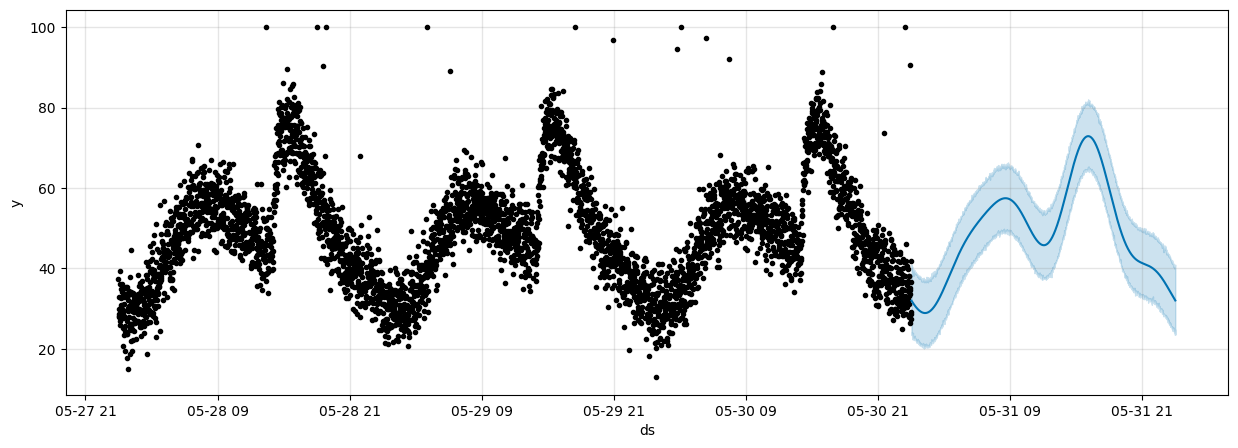

In [36]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(test_forecast,
                 ax=ax)
plt.show()

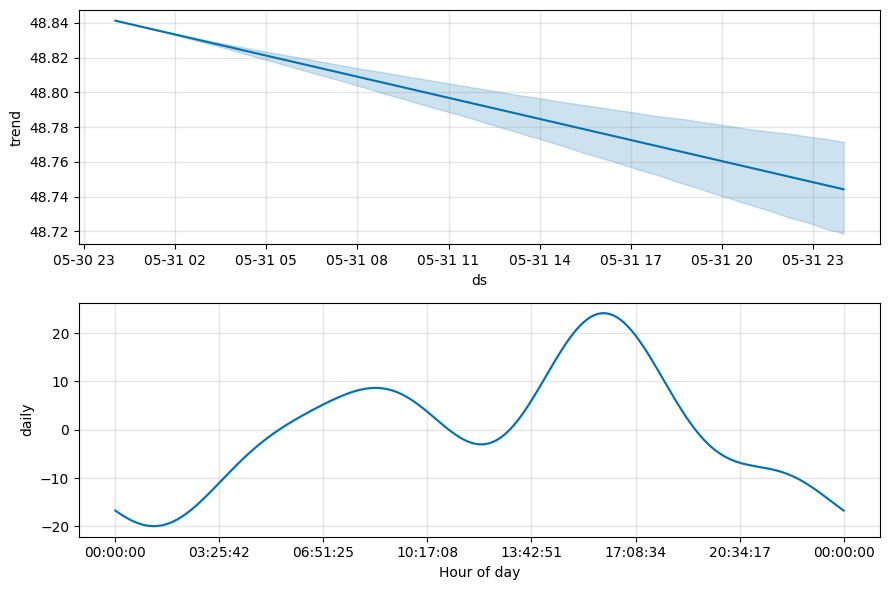

In [53]:
fig = model.plot_components(test_forecast)


In [56]:


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=data_test['cpu_usage'],
                   y_pred=test_forecast['yhat'])



np.float64(21.879978948522645)